# Load Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.tag import pos_tag
import spacy

from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

import re
from collections import Counter
from prettytable import PrettyTable
import docx

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [4]:
df = pd.read_csv('./chatgpt1.csv')
df.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


In [5]:
### print 1 comment
# df["content"].values[1]

df.shape

(50001, 20)

In [126]:
# df= df.dropna(subset=['Text'])
# df= df.drop(df[14894] , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Datetime        50001 non-null  object
 1   Tweet Id        50001 non-null  int64 
 2   Text            50001 non-null  object
 3   Username        50001 non-null  object
 4   Permalink       50001 non-null  object
 5   User            50001 non-null  object
 6   Outlinks        19942 non-null  object
 7   CountLinks      19942 non-null  object
 8   ReplyCount      50001 non-null  int64 
 9   RetweetCount    50001 non-null  int64 
 10  LikeCount       50001 non-null  int64 
 11  QuoteCount      50001 non-null  int64 
 12  ConversationId  50001 non-null  int64 
 13  Language        50001 non-null  object
 14  Source          50001 non-null  object
 15  Media           9502 non-null   object
 16  QuotedTweet     3563 non-null   object
 17  MentionedUsers  17169 non-null  object
 18  hashta

# Exploratory Data Analysis (EDA)

### Number of tweets with languages used in the tweets

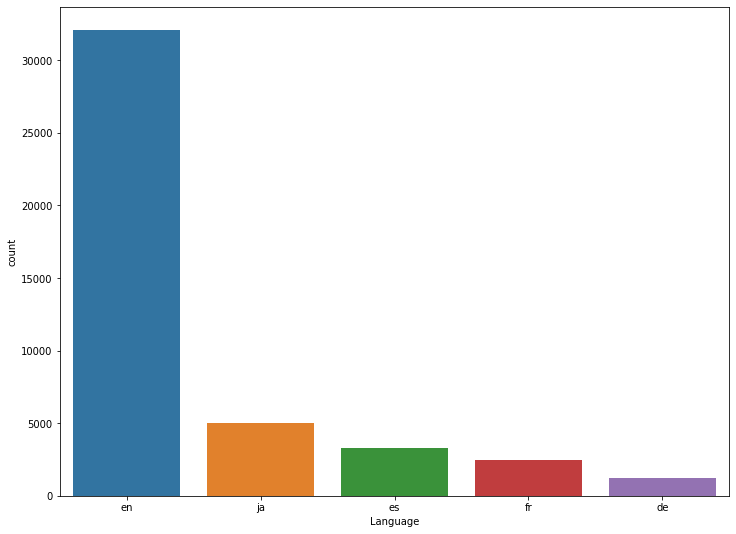

In [57]:
plt.figure(figsize=(12,9))
sns.countplot(data=df, x='Language', order=df["Language"].value_counts().index[:5])
plt.savefig('fig1.png')
plt.show()

### Number of tweets posted with time range

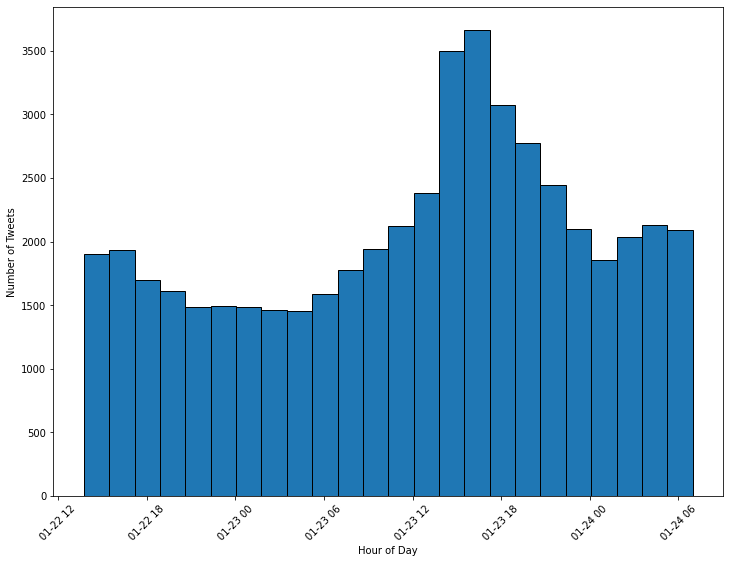

In [58]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['day'] = df['Datetime'].dt.day
plt.figure(figsize=(12,9))
plt.hist(df['Datetime'], bins=24, edgecolor='black')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.xticks(rotation = 45)
plt.savefig('fig2.png')
plt.show()

As above fig shown, the dataset data is collected on January 22 to January 24 (three days).

### Number of tweets posted with number of likecounts

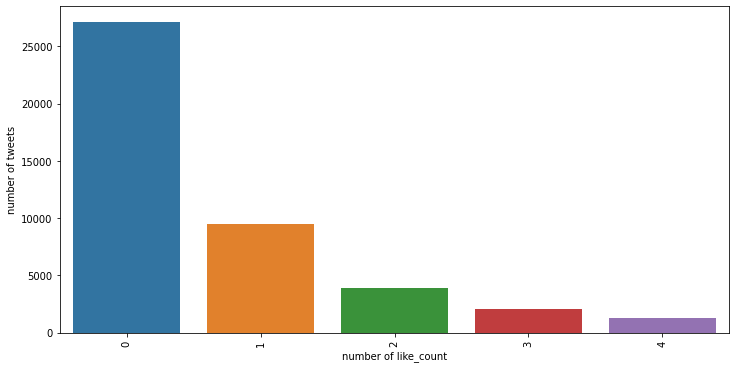

In [109]:
plt.figure(figsize=(12,6))
ax=sns.countplot(data=df, x='LikeCount', order=df["LikeCount"].value_counts().index[:5])
ax.set_xlabel("number of like_count")
ax.set_ylabel("number of tweets")
plt.xticks(rotation=90)
plt.savefig('fig2-3.png')
plt.show()

### Number of tweets posted with number of replycounts

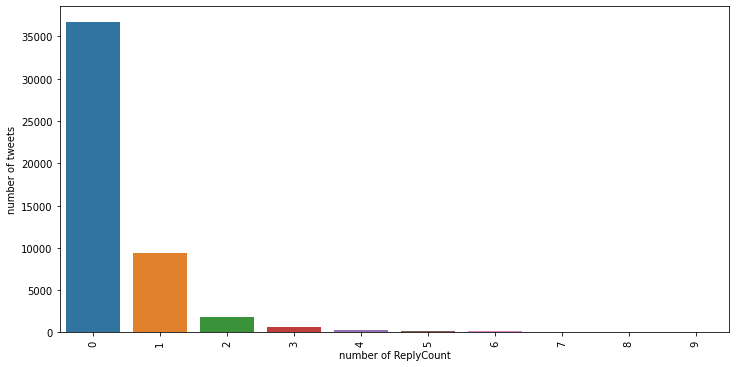

In [108]:
plt.figure(figsize=(12,6))
ax=sns.countplot(data=df, x='ReplyCount', order=df["ReplyCount"].value_counts().index[:10])
ax.set_xlabel("number of ReplyCount")
ax.set_ylabel("number of tweets")
plt.xticks(rotation=90)
plt.show()

### Number of tweets posted with number of retweetcounts

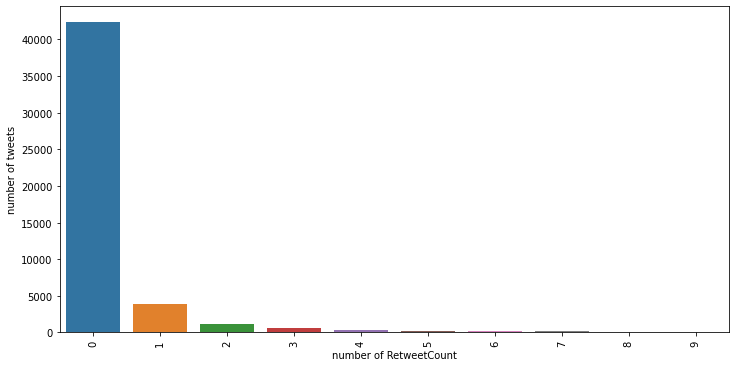

In [10]:
plt.figure(figsize=(12,6))
ax=sns.countplot(data=df, x='RetweetCount', order=df["RetweetCount"].value_counts().index[:10])
ax.set_xlabel("number of RetweetCount")
ax.set_ylabel("number of tweets")
plt.xticks(rotation=90)
plt.show()

### Number of tweets posted with number of hastagcounts

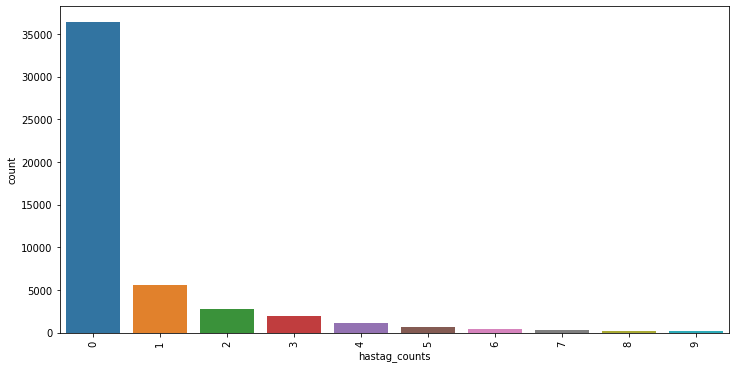

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='hastag_counts', order=df["hastag_counts"].value_counts().index[:10])
plt.xticks(rotation = 90)
plt.show()

### Top 10 Mentioned words in whole dataset

In [75]:

def calcuate_word_frequency(text):
    text= re.sub(r'[^\w\s]', '',text.lower())
    tokens = nltk.word_tokenize(text)
    #Remove stopword
    stop_words = set(stopwords.words('english'))
    words = [word for word in tokens if word not in stop_words]
    #Count frequency of each word
    word_counts = Counter(words)
    return word_counts

def display_word_frequency_table(word_counts,type):
    table = PrettyTable([type, "Frequency"])
    for word,count  in word_counts:
        table.add_row([word,count])
    print(table)
def save_table_to_fig(df,figname):
    doc = docx.Document()
    t = doc.add_table(rows=(df.shape[0] + 1), cols=df.shape[1], style='TableGrid')
    # Add borders
    # Add the column headings
    for j in range(df.shape[1]):
        t.cell(0, j).text = df.columns[j]
    # Add the body of the data frame
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            cell = df.iat[i, j]
            t.cell(i + 1, j).text = str(cell)
    doc.save(figname)

all_words = "".join(sentence for sentence in df["Text"])
word_counts = calcuate_word_frequency(all_words)
temp_table= pd.DataFrame(word_counts.most_common()[:10], columns =['Word', 'Frequency'])
temp_table

,Word,Frequency
0,chatgpt,36533
1,ai,7864
2,de,7202
3,openai,4350
4,gpt,3425
5,chat,3400
6,que,3258
7,la,2886
8,like,2518
9,en,2485


# NLP with NLTK

find most used word among the most reacted posts. after removing the stopwords and preliminary text analysis

### Tokenizing words from text

In [22]:
# keep the english tweet and keep the text feautre.
import string
nlp_df= df[df['Language'] == 'en']
all_docs = nlp_df['Text'].values

In [23]:
# remove punctuation and tokenized the tweet text
exclude = set(string.punctuation)
tokenized = []
for doc in all_docs:
    tokens = nltk.word_tokenize(doc.lower())
    tokenized.append(''.join([ch for ch in ' '.join(tokens) if ch not in exclude]).split())
nlp_df['Word Tokenized'] = tokenized
nlp_df[['Tweet Id','Word Tokenized']].head()

C:\Users\andre\AppData\Local\Temp\ipykernel_10500\4125845278.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlp_df['Word Tokenized'] = tokenized


,Tweet Id,Word Tokenized
1,1617156291046133761,"[alexandrovnaing, prohibition, of, chatgpt, ha..."
3,1617156332297256961,"[bow, down, to, chatgpt, 🫡, https, tcoentszi2aq9]"
6,1617156389217894400,"[chatgpt, runs, 10k, nvidia, training, gpus, w..."
7,1617156393898745858,"[swengdad, there, is, repetitive, work, in, ev..."
8,1617156404137295878,"[i, created, a, fictional, jewelry, brand, usi..."


### Removing Stopwords from Tokens

In [24]:
sw = set(stopwords.words('english'))
sw.add('rt')
sw.add('...')

sw_removed = []
# Remove stopword, http links, and text length less than 2
for index, tokens in enumerate(nlp_df['Word Tokenized']):
    sw_removed.append([i for i in tokens
                      if i not in sw
                      and len(i)>2
                      and (not i.startswith("http"))])
nlp_df['Stopword Removed'] = sw_removed
nlp_df[['Tweet Id','Stopword Removed']].head()

C:\Users\andre\AppData\Local\Temp\ipykernel_10500\4137478686.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlp_df['Stopword Removed'] = sw_removed


,Tweet Id,Stopword Removed
1,1617156291046133761,"[alexandrovnaing, prohibition, chatgpt, added,..."
3,1617156332297256961,"[bow, chatgpt, tcoentszi2aq9]"
6,1617156389217894400,"[chatgpt, runs, 10k, nvidia, training, gpus, p..."
7,1617156393898745858,"[swengdad, repetitive, work, every, job, lots,..."
8,1617156404137295878,"[created, fictional, jewelry, brand, using, ch..."


### Add pos_tag to token (Maybe useful)

In [25]:
# Adding Part of Speech Tagging
pos_tags_list = []
for tokens in nlp_df['Word Tokenized']:
    pos_tags = nltk.pos_tag(tokens)
    pos_tags_list.append(pos_tags)
nlp_df['pos_tags'] = pos_tags_list
nlp_df[['Tweet Id','pos_tags']].head()

C:\Users\andre\AppData\Local\Temp\ipykernel_10500\1510974931.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlp_df['pos_tags'] = pos_tags_list


,Tweet Id,pos_tags
1,1617156291046133761,"[(alexandrovnaing, VBG), (prohibition, NN), (o..."
3,1617156332297256961,"[(bow, RB), (down, RB), (to, TO), (chatgpt, VB..."
6,1617156389217894400,"[(chatgpt, NN), (runs, VBZ), (10k, CD), (nvidi..."
7,1617156393898745858,"[(swengdad, NN), (there, EX), (is, VBZ), (repe..."
8,1617156404137295878,"[(i, RB), (created, VBD), (a, DT), (fictional,..."


### Word Stemming (Not used)

In [26]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming(words):
    return [stemmer.stem(word) for word in words]

nlp_df['Word Stemmed'] = nlp_df['Stopword Removed'].apply(stemming)
nlp_df[['Tweet Id','Word Stemmed']].head(5)

C:\Users\andre\AppData\Local\Temp\ipykernel_10500\690043007.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlp_df['Word Stemmed'] = nlp_df['Stopword Removed'].apply(stemming)


,Tweet Id,Word Stemmed
1,1617156291046133761,"[alexandrovna, prohibit, chatgpt, ad, honor, c..."
3,1617156332297256961,"[bow, chatgpt, tcoentszi2aq9]"
6,1617156389217894400,"[chatgpt, run, 10k, nvidia, train, gpu, potent..."
7,1617156393898745858,"[swengdad, repetit, work, everi, job, lot, sma..."
8,1617156404137295878,"[creat, fiction, jewelri, brand, use, chatgpt,..."


### Top 10 Mentioned Tokens in whole dataset

In [77]:
all_tokens = [token for sublist in nlp_df['Stopword Removed'] for token in sublist]
token_counts = Counter(all_tokens)
top_10_tokens = token_counts.most_common(10)

# for token, count in top_10_tokens:
#     print(f'Token: {token}, Count: {count}')
temp_table= pd.DataFrame(top_10_tokens, columns =['Word', 'Frequency'])
save_table_to_fig(temp_table,'table1.docx')
temp_table

c:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\docx\styles\styles.py:139: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  return self._get_style_id_from_style(self[style_name], style_type)


,Word,Frequency
0,chatgpt,32307
1,openai,3858
2,microsoft,2763
3,chat,2660
4,gpt,2578
5,like,2523
6,use,2340
7,google,2044
8,using,1728
9,new,1545


---

# VADER Seniment Scoring

cons: This method doesn't count the relationship between word

### Using Vader to generate Seniment Label

In [34]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

sia = SentimentIntensityAnalyzer()

In [35]:
res = {}
for i, row in tqdm(nlp_df.iterrows(),total = len(nlp_df)):
    text = row["Text"]
    myid = row["Tweet Id"]
    temp = sia.polarity_scores(text)
    if(temp["compound"]>=0.05):
        temp["sentiment"]= "Positive"
    elif(temp["compound"]<=-0.05):
        temp["sentiment"]= "Negative"
    else:
        temp["sentiment"]= "Neutral"
    res[myid] =temp

  0%|          | 0/32076 [00:00<?, ?it/s]

100%|██████████| 32076/32076 [00:15<00:00, 2090.72it/s]


### Combining the seniment result with dataset

In [36]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Tweet Id'})
vadersResult=vaders.merge(nlp_df,how='left')
vadersResult.head(5)

,Tweet Id,neg,neu,pos,compound,sentiment,Datetime,Text,Username,Permalink,...,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,day,Word Tokenized,Stopword Removed,pos_tags,Word Stemmed
0,1617156291046133761,0.0,0.814,0.186,0.4939,Positive,2023-01-22 13:44:39+00:00,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,...,NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0,22,"[alexandrovnaing, prohibition, of, chatgpt, ha...","[alexandrovnaing, prohibition, chatgpt, added,...","[(alexandrovnaing, VBG), (prohibition, NN), (o...","[alexandrovna, prohibit, chatgpt, ad, honor, c..."
1,1617156332297256961,0.0,1.0,0.0,0.0,Neutral,2023-01-22 13:44:49+00:00,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,...,NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0,22,"[bow, down, to, chatgpt, 🫡, https, tcoentszi2aq9]","[bow, chatgpt, tcoentszi2aq9]","[(bow, RB), (down, RB), (to, TO), (chatgpt, VB...","[bow, chatgpt, tcoentszi2aq9]"
2,1617156389217894400,0.0,1.0,0.0,0.0,Neutral,2023-01-22 13:45:03+00:00,ChatGPT runs 10K Nvidia training GPUs with pot...,FierceElectron,https://twitter.com/FierceElectron/status/1617...,...,NaN,NaN,NaN,[],0,22,"[chatgpt, runs, 10k, nvidia, training, gpus, w...","[chatgpt, runs, 10k, nvidia, training, gpus, p...","[(chatgpt, NN), (runs, VBZ), (10k, CD), (nvidi...","[chatgpt, run, 10k, nvidia, train, gpu, potent..."
3,1617156393898745858,0.067,0.933,0.0,-0.25,Negative,2023-01-22 13:45:04+00:00,@SWENGDAD There is repetitive work in every jo...,xlr8harder,https://twitter.com/xlr8harder/status/16171563...,...,NaN,NaN,"[User(username='SWENGDAD', id=1460452950875193...",[],0,22,"[swengdad, there, is, repetitive, work, in, ev...","[swengdad, repetitive, work, every, job, lots,...","[(swengdad, NN), (there, EX), (is, VBZ), (repe...","[swengdad, repetit, work, everi, job, lot, sma..."
4,1617156404137295878,0.0,0.846,0.154,0.25,Positive,2023-01-22 13:45:06+00:00,I created a fictional jewelry brand using Chat...,Kosuke_dazo,https://twitter.com/Kosuke_dazo/status/1617156...,...,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#ChatGPT', '#midjourney']",2,22,"[i, created, a, fictional, jewelry, brand, usi...","[created, fictional, jewelry, brand, using, ch...","[(i, RB), (created, VBD), (a, DT), (fictional,...","[creat, fiction, jewelri, brand, use, chatgpt,..."


In [60]:
# save csvfile
vadersResult.to_csv("vadersResult.csv",index=False)

### Number of count with the sentiment label in Vader method

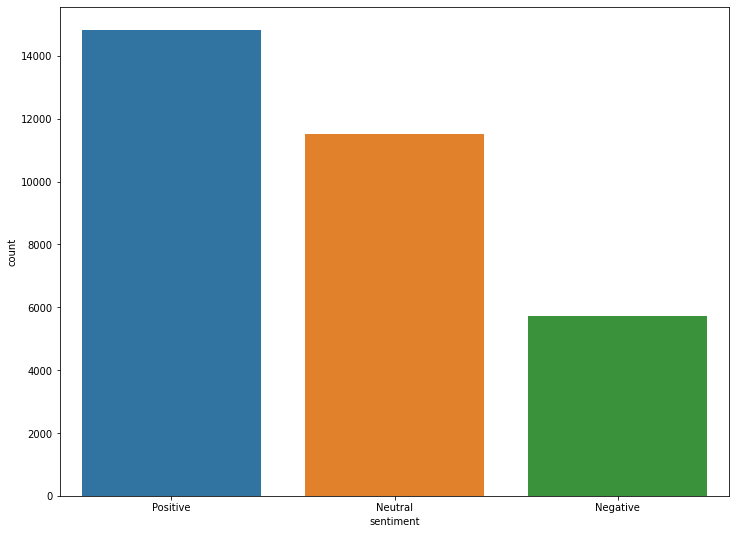

In [62]:
plt.figure(figsize=(12,9))
sns.countplot(x="sentiment",data=vadersResult,order=['Positive', 'Neutral', 'Negative'])
plt.savefig('fig3.png')
plt.show()

In [102]:
vadersResult["sentiment"].value_counts()

Positive    14825
Neutral     11523
Negative     5728
Name: sentiment, dtype: int64

### Top 10 Mentioned Tokens in Positive tweets in Vader method

In [40]:
# pos_tweets = vadersResult[vadersResult["sentiment"]=="Positive"]
# all_words = "".join(sentence for sentence in pos_tweets["Text"])
# word_counts = calcuate_word_frequency(all_words)
# display_word_frequency_table(word_counts.most_common()[:30])

pos_tweets = vadersResult[vadersResult["sentiment"]=="Positive"]
all_tokens = [token for sublist in pos_tweets['Stopword Removed'] for token in sublist]
token_counts = Counter(all_tokens)
top_10_tokens = token_counts.most_common(10)

temp_table= pd.DataFrame(top_10_tokens, columns =['Word', 'Frequency'])
temp_table

,Word,Frequency
0,chatgpt,15419
1,like,2161
2,openai,1755
3,use,1290
4,chat,1195
5,gpt,1163
6,microsoft,1075
7,using,934
8,google,842
9,write,814


### Top 10 Mentioned Tokens in Negative tweets in Vader method

In [41]:
# neg_tweets = vadersResult[vadersResult["sentiment"]=="Negative"]
# all_words = "".join(sentence for sentence in neg_tweets["Text"])
# word_counts = calcuate_word_frequency(all_words)
# display_word_frequency_table(word_counts.most_common()[:30])

neg_tweets = vadersResult[vadersResult["sentiment"]=="Negative"]
all_tokens = [token for sublist in neg_tweets['Stopword Removed'] for token in sublist]
token_counts = Counter(all_tokens)
top_10_tokens = token_counts.most_common(10)

temp_table= pd.DataFrame(top_10_tokens, columns =['Word', 'Frequency'])
temp_table

,Word,Frequency
0,chatgpt,5832
1,google,540
2,chat,445
3,gpt,419
4,use,407
5,openai,398
6,people,332
7,like,325
8,one,304
9,using,298


### Top 10 Mentioned Tokens in Neutral tweets in Vader method

In [42]:
# neu_tweets = vadersResult[vadersResult["sentiment"]=="Positive"]
# all_words = "".join(sentence for sentence in pos_tweets["Text"])
# word_counts = calcuate_word_frequency(all_words)
# display_word_frequency_table(word_counts.most_common()[:30])

neu_tweets = vadersResult[vadersResult["sentiment"]=="Neutral"]
all_tokens = [token for sublist in neu_tweets['Stopword Removed'] for token in sublist]
token_counts = Counter(all_tokens)
top_10_tokens = token_counts.most_common(10)

temp_table= pd.DataFrame(top_10_tokens, columns =['Word', 'Frequency'])
temp_table

,Word,Frequency
0,chatgpt,11056
1,openai,1705
2,microsoft,1456
3,chat,1020
4,gpt,996
5,google,662
6,use,643
7,via,541
8,investment,526
9,using,496


# Roberta Pretrained Model

In [43]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [44]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [71]:
example = df["Text"][1]
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)
# unknown lanuage
# df["Text"][14894]

{'roberta_neg': 0.008655095, 'roberta_neu': 0.56082135, 'roberta_pos': 0.4305236}


In [45]:
res2= {}
for i, row in tqdm(nlp_df.iterrows(),total = len(df)):
    try:
        text = row["Text"]
        myid = row["Tweet Id"]
        encoded_text = tokenizer(text, return_tensors='pt')
        output = model(**encoded_text)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        scores_dict = {
            'roberta_neg' : scores[0],
            'roberta_neu' : scores[1],
            'roberta_pos' : scores[2]
            }
        res2[myid] = scores_dict
        temp = scores_dict
        largestvalue = max(temp, key=temp.get)
        if(largestvalue=="roberta_pos"):
            temp["sentiment"]= "Positive"
        elif(largestvalue=="roberta_neg"):
            temp["sentiment"]= "Negative"
        else:
            temp["sentiment"]= "Neutral"
        res2[myid] =temp
    except Exception as e:
        # Handle the crash
        print(f"Encountered a crash: {e}")
        continue

 64%|██████▍   | 32076/50001 [57:16<32:00,  9.33it/s]  


In [46]:
roberta = pd.DataFrame(res2).T
roberta = roberta.reset_index().rename(columns={'index':'Tweet Id'})
robertaResult = roberta.merge(nlp_df,how='right')
robertaResult.head(5)

,Tweet Id,roberta_neg,roberta_neu,roberta_pos,sentiment,Datetime,Text,Username,Permalink,User,...,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,day,Word Tokenized,Stopword Removed,pos_tags,Word Stemmed
0,1617156291046133761,0.008655,0.560821,0.430524,Neutral,2023-01-22 13:44:39+00:00,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,...,NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0,22,"[alexandrovnaing, prohibition, of, chatgpt, ha...","[alexandrovnaing, prohibition, chatgpt, added,...","[(alexandrovnaing, VBG), (prohibition, NN), (o...","[alexandrovna, prohibit, chatgpt, ad, honor, c..."
1,1617156332297256961,0.048818,0.895561,0.055621,Neutral,2023-01-22 13:44:49+00:00,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,...,NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0,22,"[bow, down, to, chatgpt, 🫡, https, tcoentszi2aq9]","[bow, chatgpt, tcoentszi2aq9]","[(bow, RB), (down, RB), (to, TO), (chatgpt, VB...","[bow, chatgpt, tcoentszi2aq9]"
2,1617156389217894400,0.004709,0.617854,0.377437,Neutral,2023-01-22 13:45:03+00:00,ChatGPT runs 10K Nvidia training GPUs with pot...,FierceElectron,https://twitter.com/FierceElectron/status/1617...,https://twitter.com/FierceElectron,...,NaN,NaN,NaN,[],0,22,"[chatgpt, runs, 10k, nvidia, training, gpus, w...","[chatgpt, runs, 10k, nvidia, training, gpus, p...","[(chatgpt, NN), (runs, VBZ), (10k, CD), (nvidi...","[chatgpt, run, 10k, nvidia, train, gpu, potent..."
3,1617156393898745858,0.014811,0.331287,0.653902,Positive,2023-01-22 13:45:04+00:00,@SWENGDAD There is repetitive work in every jo...,xlr8harder,https://twitter.com/xlr8harder/status/16171563...,https://twitter.com/xlr8harder,...,NaN,NaN,"[User(username='SWENGDAD', id=1460452950875193...",[],0,22,"[swengdad, there, is, repetitive, work, in, ev...","[swengdad, repetitive, work, every, job, lots,...","[(swengdad, NN), (there, EX), (is, VBZ), (repe...","[swengdad, repetit, work, everi, job, lot, sma..."
4,1617156404137295878,0.026949,0.885862,0.087189,Neutral,2023-01-22 13:45:06+00:00,I created a fictional jewelry brand using Chat...,Kosuke_dazo,https://twitter.com/Kosuke_dazo/status/1617156...,https://twitter.com/Kosuke_dazo,...,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#ChatGPT', '#midjourney']",2,22,"[i, created, a, fictional, jewelry, brand, usi...","[created, fictional, jewelry, brand, using, ch...","[(i, RB), (created, VBD), (a, DT), (fictional,...","[creat, fiction, jewelri, brand, use, chatgpt,..."


In [47]:
robertaResult.to_csv("robertaResult.csv",index=False)

### Number of counts with the sentiment label (using RoBERTa model) in whole dataset


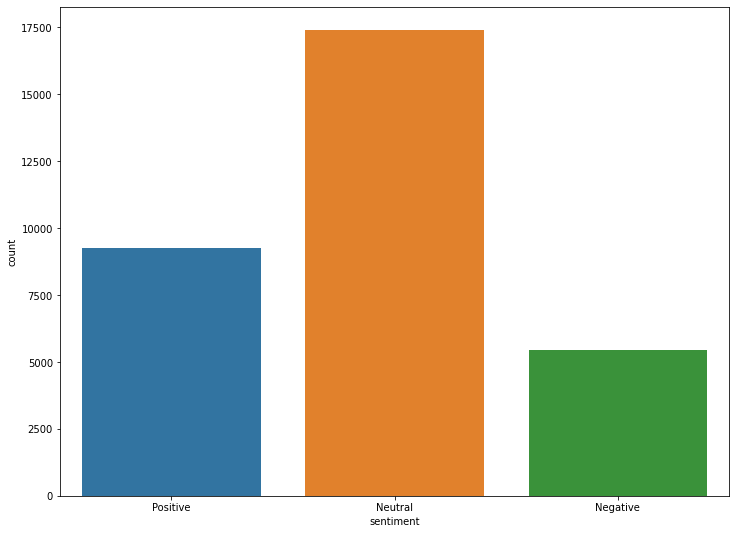

In [63]:
plt.figure(figsize=(12,9))
sns.countplot(x="sentiment",data=robertaResult,order=['Positive', 'Neutral', 'Negative'])
plt.savefig('fig4.png')
plt.show()

In [103]:
robertaResult["sentiment"].value_counts()

Neutral     17396
Positive     9251
Negative     5429
Name: sentiment, dtype: int64

### Top 10 Mentioned Tokens in Positive tweets in Roberta model

In [50]:
pos_tweets = robertaResult[robertaResult["sentiment"]=="Positive"]
all_tokens = [token for sublist in pos_tweets['Stopword Removed'] for token in sublist]
token_counts = Counter(all_tokens)
top_10_tokens = token_counts.most_common(10)

temp_table= pd.DataFrame(top_10_tokens, columns =['Word', 'Frequency'])
temp_table

,Word,Frequency
0,chatgpt,9634
1,openai,1760
2,microsoft,1344
3,like,804
4,new,740
5,use,732
6,chat,686
7,google,684
8,gpt,654
9,using,565


### Top 10 Mentioned Tokens in Negative tweets in Roberta model

In [51]:
neg_tweets = robertaResult[robertaResult["sentiment"]=="Negative"]
all_tokens = [token for sublist in neg_tweets['Stopword Removed'] for token in sublist]
token_counts = Counter(all_tokens)
top_10_tokens = token_counts.most_common(10)

temp_table= pd.DataFrame(top_10_tokens, columns =['Word', 'Frequency'])
temp_table

,Word,Frequency
0,chatgpt,5363
1,like,652
2,chat,497
3,people,476
4,gpt,475
5,use,393
6,think,345
7,google,322
8,would,319
9,get,311


### Top 10 Mentioned Tokens in N Netural in Roberta model

In [52]:
neu_tweets = robertaResult[robertaResult["sentiment"]=="Neutral"]
all_tokens = [token for sublist in neu_tweets['Stopword Removed'] for token in sublist]
token_counts = Counter(all_tokens)
top_10_tokens = token_counts.most_common(10)

temp_table= pd.DataFrame(top_10_tokens, columns =['Word', 'Frequency'])
temp_table

,Word,Frequency
0,chatgpt,17310
1,openai,1882
2,chat,1477
3,gpt,1449
4,microsoft,1314
5,use,1215
6,like,1067
7,google,1038
8,using,853
9,write,806


In [78]:
# ErrorText=robertaResult[robertaResult['sentiment'].isna()]
# ErrorText["Text"]

## Combine and compare

In [138]:
# vadersResult[['Text',
#                  'neg',
#                  'neu',
#                  'pos',
#                  'compound',
#                  'sentiment']]
rename_VaderResults={}
for key,value in vaders.items():
    if key !="Tweet Id":
        rename_VaderResults[f"vader_{key}"]=value
    else:
        rename_VaderResults[key]=value
rename_VaderResults=pd.DataFrame(rename_VaderResults)
rename_VaderResults.head(3)

,Tweet Id,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment
0,1617156291046133761,0.0,0.814,0.186,0.4939,Positive
1,1617156332297256961,0.0,1.0,0.0,0.0,Neutral
2,1617156389217894400,0.0,1.0,0.0,0.0,Neutral


In [139]:
roberta

,Tweet Id,roberta_neg,roberta_neu,roberta_pos,sentiment
0,1617156291046133761,0.008655,0.560821,0.430524,Neutral
1,1617156332297256961,0.048818,0.895561,0.055621,Neutral
2,1617156389217894400,0.004709,0.617854,0.377437,Neutral
3,1617156393898745858,0.014811,0.331287,0.653902,Positive
4,1617156404137295878,0.026949,0.885862,0.087189,Neutral
...,...,...,...,...,...
32071,1617778649490489346,0.001788,0.151467,0.846744,Positive
32072,1617778662681772033,0.892805,0.097901,0.009294,Negative
32073,1617778665189953536,0.210467,0.508082,0.281451,Neutral
32074,1617778701374205952,0.58026,0.365413,0.054327,Negative


In [216]:
combine_result = rename_VaderResults.merge(roberta,how='right')
combine_result= combine_result.rename(columns={"sentiment":"roberta_sentiment"})
# join the "text" column
combine_result = combine_result.merge(nlp_df[['Tweet Id','Text']],how='right')
combine_result.head(3)

,Tweet Id,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment,roberta_neg,roberta_neu,roberta_pos,roberta_sentiment,Text
0,1617156291046133761,0.0,0.814,0.186,0.4939,Positive,0.008655,0.560821,0.430524,Neutral,@AlexandrovnaIng Prohibition of ChatGPT has be...
1,1617156332297256961,0.0,1.0,0.0,0.0,Neutral,0.048818,0.895561,0.055621,Neutral,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...
2,1617156389217894400,0.0,1.0,0.0,0.0,Neutral,0.004709,0.617854,0.377437,Neutral,ChatGPT runs 10K Nvidia training GPUs with pot...


In [221]:
compare_tweets = combine_result[(combine_result['vader_sentiment']=="Positive") & (combine_result['roberta_sentiment']=="Negative")].head(5)
for sent in compare_tweets["Text"].head(5):
    print("-----------")
    print(sent)

-----------
i like when I call out chatgpt for telling me something that is obviously false and then she apologizes and tells me something else totally false.

reminds me of working with a construction contractor.
-----------
Will someone please explain how chatGPT can be used by students to cheat?
If more than one student takes help from chatGPT , won't they all get the same answer for the same question so it should be easy to catch.
-----------
@tunguz Seems like ChatGPT is already unleashed upon the masses without their help.
-----------
ChatGPT has been slow and unresponsive for the past few days.

Who is ChatGPT’s reporting manager? I want to escalate this issue.
-----------
@openaicommunity be quite ???? man this ai is giving me the shivers. here too i told chat gpt to write me a greeting message and include a joke and of all jokes he chose this https://t.co/Lq54hxOPrO


In [222]:
compare_tweets = combine_result[(combine_result['vader_sentiment']=="Negative") & (combine_result['roberta_sentiment']=="Positive")].head(5)
for sent in compare_tweets["Text"].head(5):
    print("-----------")
    print(sent)

-----------
@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.
-----------
@AlanLevinovitz To be fair, ChatGPT could easily generate the same quality of headlines as is currently written by NYT - no sacrifice in angry clickbait views, and for a fraction of the cost!
-----------
Microsoft Bets Big on the Creator of ChatGPT in Race to Dominate A.I.

#Microsoft #OpenAI https://t.co/EuTc2ILOmd
-----------
https://t.co/o77c51qjSp
We aliens have been using ChatGPT since our species evolved from rocks. So, why not join us and learn the secrets of the universe! 👽
-----------
#Tech #NewsFlash 01/22
I spent an hour with a new, ChatGPT-inspired AI chatbot, and I may die laughing
https://t.co/SPUjZYkXpZ
#Technology #Bot #News


In [226]:
confusion_matrix = pd.crosstab(combine_result['vader_sentiment'], combine_result['roberta_sentiment'], rownames=['vader'], colnames=['roberta'])
save_table_to_fig(confusion_matrix,'confusion_matrix.docx')
confusion_matrix

c:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\docx\styles\styles.py:139: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  return self._get_style_id_from_style(self[style_name], style_type)


roberta,Negative,Neutral,Positive
vader,,,
Negative,2840,2347,541
Neutral,1020,8774,1729
Positive,1569,6275,6981


# Particular group with Sentiment results

### Top 10 Mentioned Company Tokens in full dataset

In [96]:
# Loading top 2000 company dataset 
df_forbes = pd.read_csv("./Forbes_2000_top_company_CLNQ11.csv")
company_names = set(df_forbes["Organization Name"].str.lower().tolist())
company_names.add("openai")
tokens_list = nlp_df['Stopword Removed'].tolist()
tokens = [token for tokens in tokens_list for token in tokens]
found_companies = [token for token in tokens if token.lower() in company_names]
companies_counts = Counter(found_companies)
companies_counts
temp_table= pd.DataFrame(companies_counts.most_common()[:10], columns =['Word', 'Frequency'])
save_table_to_fig(temp_table,'table2.docx')
temp_table

c:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\docx\styles\styles.py:139: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  return self._get_style_id_from_style(self[style_name], style_type)


,Word,Frequency
0,openai,3858
1,microsoft,2763
2,next,486
3,twitter,379
4,popular,123
5,nvidia,111
6,tesla,84
7,apple,70
8,amazon,67
9,block,46


- The list of the most mentioned companies shows the Microsoft as most used companu in the tweets.
 - Twitter, Nvidia, Tesla, Apple, Amazon are the mist mentioned companies in the texts.
 - 'Next', 'popular', 'block' and 'target' could be noises in the names and also could be names of companies and we can't count on them entirely. 

### Number of counts with the sentiment label (using RoBERTa model) in tweets that mentioned “microsoft”


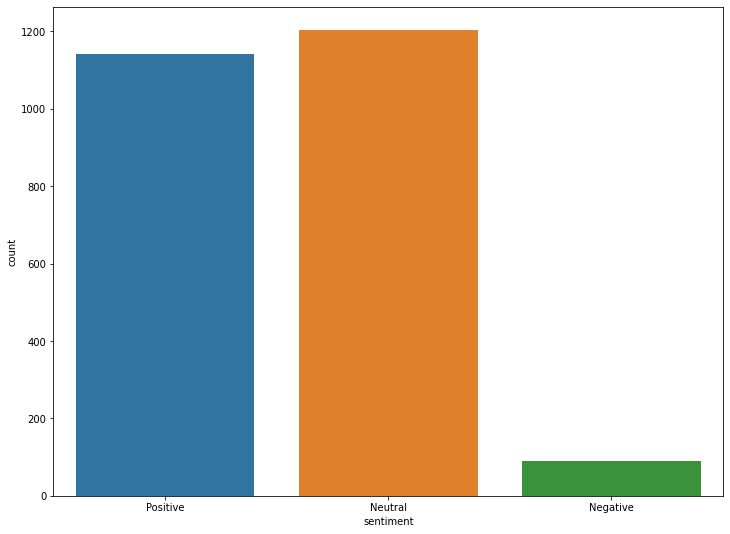

In [65]:
filtered_df = robertaResult[robertaResult['Stopword Removed'].apply(lambda tokens: 'microsoft' in tokens)]
plt.figure(figsize=(12,9))
sns.countplot(x="sentiment",data=filtered_df,order=['Positive', 'Neutral', 'Negative'])
plt.savefig('fig5.png')
plt.show()

In [70]:
pos_tweets = filtered_df[filtered_df["sentiment"]=="Negative"]
pos_tweets[['Text',
                 'roberta_pos',
                 'roberta_neg',
                 'roberta_neu',
                 'sentiment']].head()
for sent in pos_tweets["Text"].head(5):
    print("-----------")
    print(sent)

-----------
It's not at all weird that between the #ChatGPT bullshit and $MSFT reporting earnings next week, shitass Microsoft keeps trying to put Edge on my desktop.  That's a real necessary software update for you.  The answer is still a resounding fuck you, Microsoft!
-----------
#layoffs2023 is really heartbroken for those who spent most of the time of their life. People plan their entire life based on earning BUT now what to do? think about their family. #Google #Microsoft #OpenAI #ChatGPT
-----------
The Google layoff appeared to have been brutal. One observation is that a lot of tenured people were let go. Looks like a cost reduction calculation, rather than performance based. The Microsoft + ChatGpt collab is going to test Sundar Pichai’s growth and defense strategy.
-----------
half of google’s search results are ai-generated spam. meanwhile, microsoft basically bought openAI and are integrating chatgpt into bing to answer queries on-page (without showing all the ai-generated 

### Number of counts with the sentiment label (using RoBERTa model) in tweets that mentioned "openai"


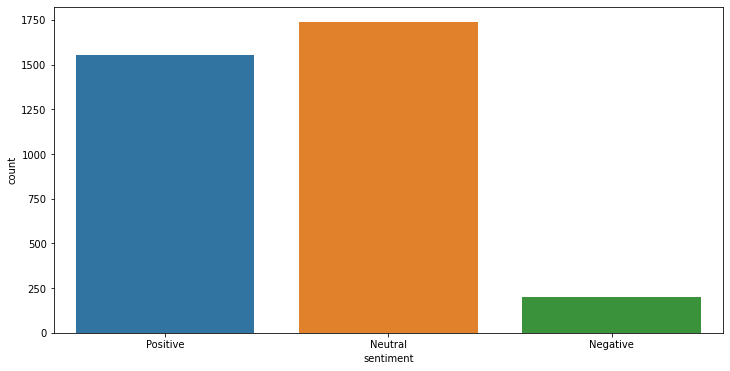

In [132]:
filtered_df = robertaResult[robertaResult['Stopword Removed'].apply(lambda tokens: 'openai' in tokens)]
plt.figure(figsize=(12,6))
sns.countplot(x="sentiment",data=filtered_df,order=['Positive', 'Neutral', 'Negative'])
plt.show()

In [133]:
pos_tweets = filtered_df[filtered_df["sentiment"]=="Negative"]
pos_tweets[['Text',
                 'roberta_pos',
                 'roberta_neg',
                 'roberta_neu',
                 'sentiment']].head()
for sent in pos_tweets["Text"].head(5):
    print("-----------")
    print(sent)

-----------
🚨⚠️🚨 #Russian criminals can't wait to hop over #OpenAI's fence, use #ChatGPT for evil #Phishing #ransomware #cyberattacks #privacy #cyberintelligence #infosec #cybersec #cybersecurity #dataprotection #databreach #Crypto #infosecurit https://t.co/apEnAcQZPx
-----------
@OpenAI why ChatGPT is not available in african countries ? https://t.co/Qd5oDRUozt
-----------
@OpenAI Chat GPT is bonkers https://t.co/OeYYXWdsxP
-----------
@Samuel_Orogun @closebracket @0xIrish369 @harishkgarg @OpenAI Didn't you read the bit that said "I don't know"? I'm literally saying I don't see the benefit of chat GPT to the third world but other ai systems would have benefit.

None of this changes the fact that chat GPT costs 42 USD monthly.
-----------
According to the AI gods, this is the current state of #unknownrealm :(
#indiedev #openai #chatgpt https://t.co/qwNu1hls6w


## perform Named Entity Recognition 

In [88]:
nlp = spacy.load("en_core_web_sm")
def extract_org_entities(tokens):
    text = " ".join(tokens)
    doc = nlp(text)
    org_entities = [ent.text for ent in doc.ents if ent.label_ == "ORG"]
    return org_entities

found_org = nlp_df["Stopword Removed"].apply(extract_org_entities)

In [91]:
all_tokens = [token for sublist in found_org for token in sublist]
org_counts = Counter(all_tokens)
top_10_tokens = org_counts.most_common(10)

temp_table= pd.DataFrame(top_10_tokens, columns =['Word', 'Frequency'])
save_table_to_fig(temp_table,'table3.docx')
temp_table

c:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\docx\styles\styles.py:139: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  return self._get_style_id_from_style(self[style_name], style_type)


,Word,Frequency
0,microsoft,2317
1,gpt,2270
2,google,740
3,chatgpt,536
4,gpt3,308
5,stanford,90
6,cnn,73
7,google chatgpt,53
8,fed,39
9,nvidia,39


In [92]:
nlp = spacy.load("en_core_web_sm")
def extract_person_entities(tokens):
    text = " ".join(tokens)
    doc = nlp(text)
    person_entities = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    return person_entities

found_people = nlp_df["Stopword Removed"].apply(extract_person_entities)

In [95]:
all_tokens = [token for sublist in found_people for token in sublist]
people_counts = Counter(all_tokens)
top_10_tokens = people_counts.most_common(10)

temp_table= pd.DataFrame(top_10_tokens, columns =['Names', 'Frequency'])
save_table_to_fig(temp_table,'table4.docx')
temp_table

c:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\docx\styles\styles.py:139: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  return self._get_style_id_from_style(self[style_name], style_type)


,Names,Frequency
0,https,60
1,larry,59
2,gautam adani,50
3,wharton,45
4,dalle2,43
5,msft microsoft,38
6,chatbot,21
7,🤣🤣,20
8,ylecun,20
9,meta chief,20


### Number of counts with the sentiment label (using RoBERTa model) in tweets that mentioned "gautam adani"


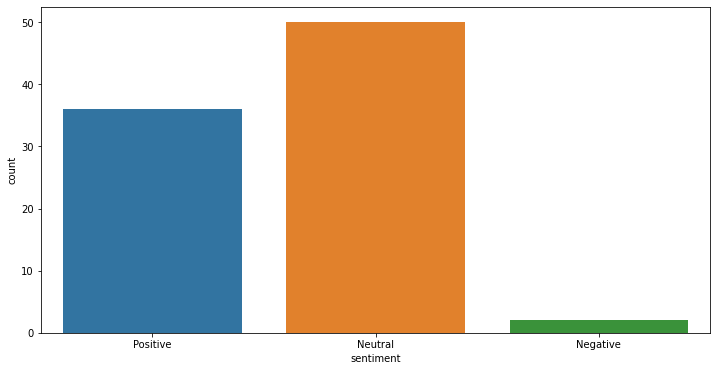

In [84]:
filtered_df = robertaResult[robertaResult['Stopword Removed'].apply(lambda tokens: 'gautam' and'adani' in tokens)]
plt.figure(figsize=(12,6))
sns.countplot(x="sentiment",data=filtered_df,order=['Positive', 'Neutral', 'Negative'])
plt.show()

In [86]:
pos_tweets = filtered_df[filtered_df["sentiment"]=="Positive"]
pos_tweets[['Text',
                 'roberta_pos',
                 'roberta_neg',
                 'roberta_neu',
                 'sentiment']].head()
for sent in pos_tweets["Text"].head(5):
    print("-----------")
    print(sent)

-----------
Even the richest man in Asia, Gautam Adani, couldn't resist the power of #ChatGPT  In a recent LinkedIn article, he praised the technology and admitted to being hooked after ChatGPT's first use. 

#ArtificialIntelligence #Adani #innovation #Growth #leadership #Job #layoffs2023 https://t.co/RQPJhHqGoJ
-----------
Asia’s Richest Billionaire Gautam Adani Reveals He Is Addicted To ChatGPT But Not Without Warnings
Adani on AI and the future of technology
By James Paul  Jan. 22, 2023 
 
Wonderful ! https://t.co/hrSFyZQkkl
-----------
Asia's richest man Gautam Adani is addicted to ChatGPT https://t.co/3frLo4aJB8
-----------
Asia's richest man Gautam Adani is addicted to ChatGPT https://t.co/MxiV5x4cx1
-----------
Asia's richest man Gautam Adani says he is addicted to ChatGPT, the powerful new AI tool that interacts with users in an eerily convincing and conversational way. https://t.co/9ymyuAD1Jk
